## Lab09 Machine Learning Practise
Please submit your finished lab09 jupyter notebook via pull request in GitHub

The dataset and problem explanation can be found here: https://www.kaggle.com/c/sberbank-russian-housing-market/overview

In [149]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [152]:
# import the pandas dataframe 
train= pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [146]:
#Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

In [3]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [4]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


# Making sense of the data

In [5]:
##Question 1: How many features in the training dataset? How many featuers in the testing dataset?

292 features in the training dataset and 291 features in the test dataset.

D:\MyApps\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


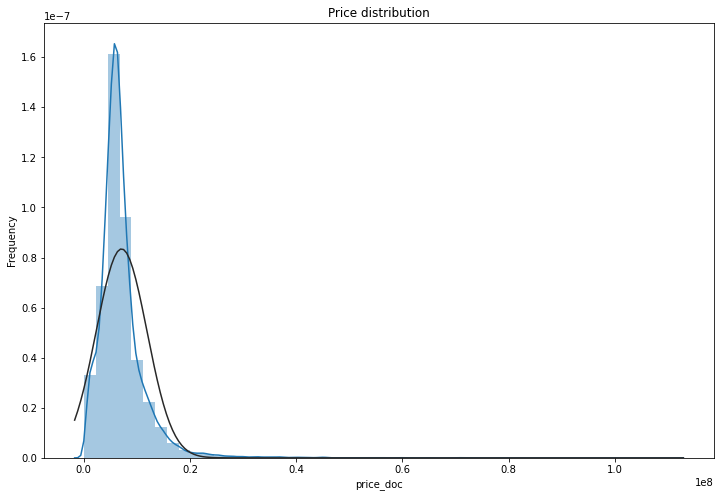

In [6]:
##Question 2: How to carry out normality test on the target variable?
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(train['price_doc'], fit=norm, ax=ax);
ax.set_ylabel('Frequency')
ax.set_title('Price distribution')
plt.show()

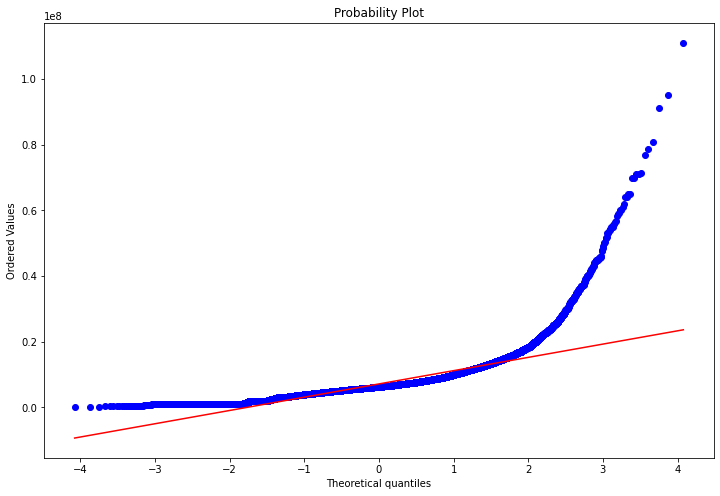

In [7]:
# the QQ-plot
fig = plt.figure(figsize=(12,8))
res = stats.probplot(train['price_doc'], plot=plt)
plt.show()

D:\MyApps\Anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


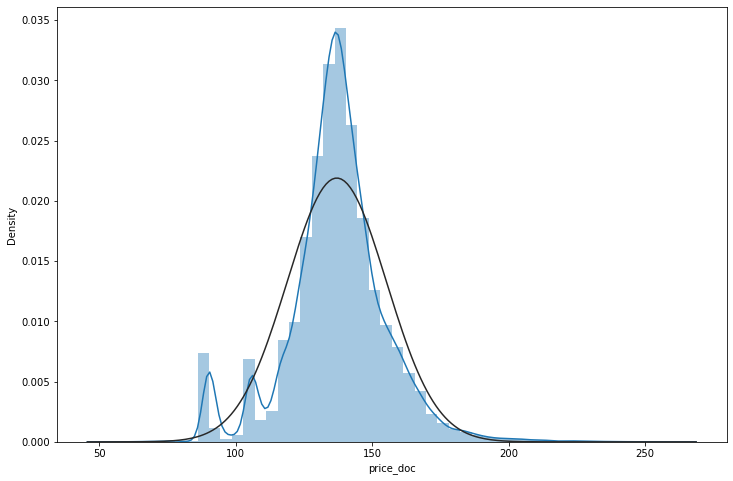

In [8]:
##Question 3. How to convert the target variable into normal distribution?
train['price_doc'],_ = stats.boxcox(train['price_doc'])
#Check the new distribution 
plt.figure(figsize=(12,8))
sns.distplot(train['price_doc'] , fit=norm);

# Correlation Analysis

<AxesSubplot:>

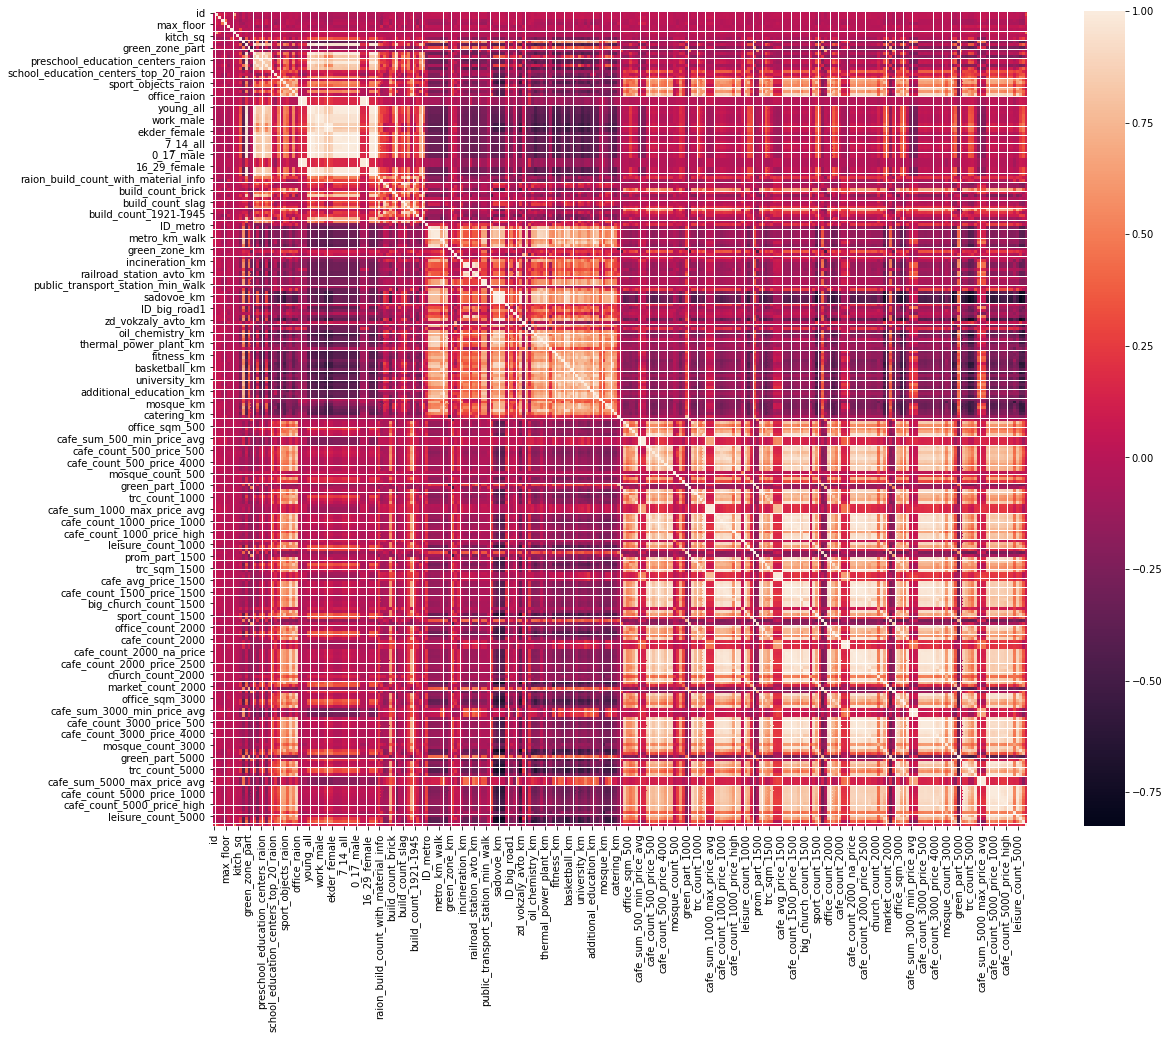

In [18]:
##Question 4: How to plot the pairwise correlation matrix? 
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, linewidths=0.001, cbar=True, square=True, ax=ax)

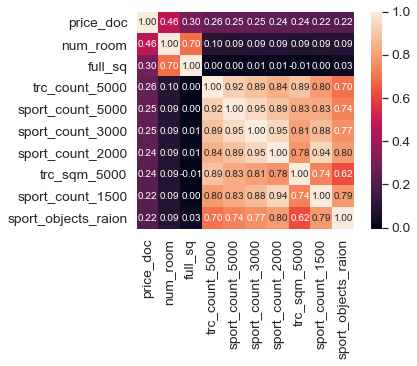

In [20]:
##Question 5: How to plot the pairwise correlation matrix of the top 10 features with respect to the target variable?
k = 10

cols = corrmat.nlargest(k, 'price_doc')['price_doc'].index
cm = train[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Question 5.1: What's the criterion to select these 10 variables and why? 

These 10 variables had top 10 correlation coefficients with the target variable. 

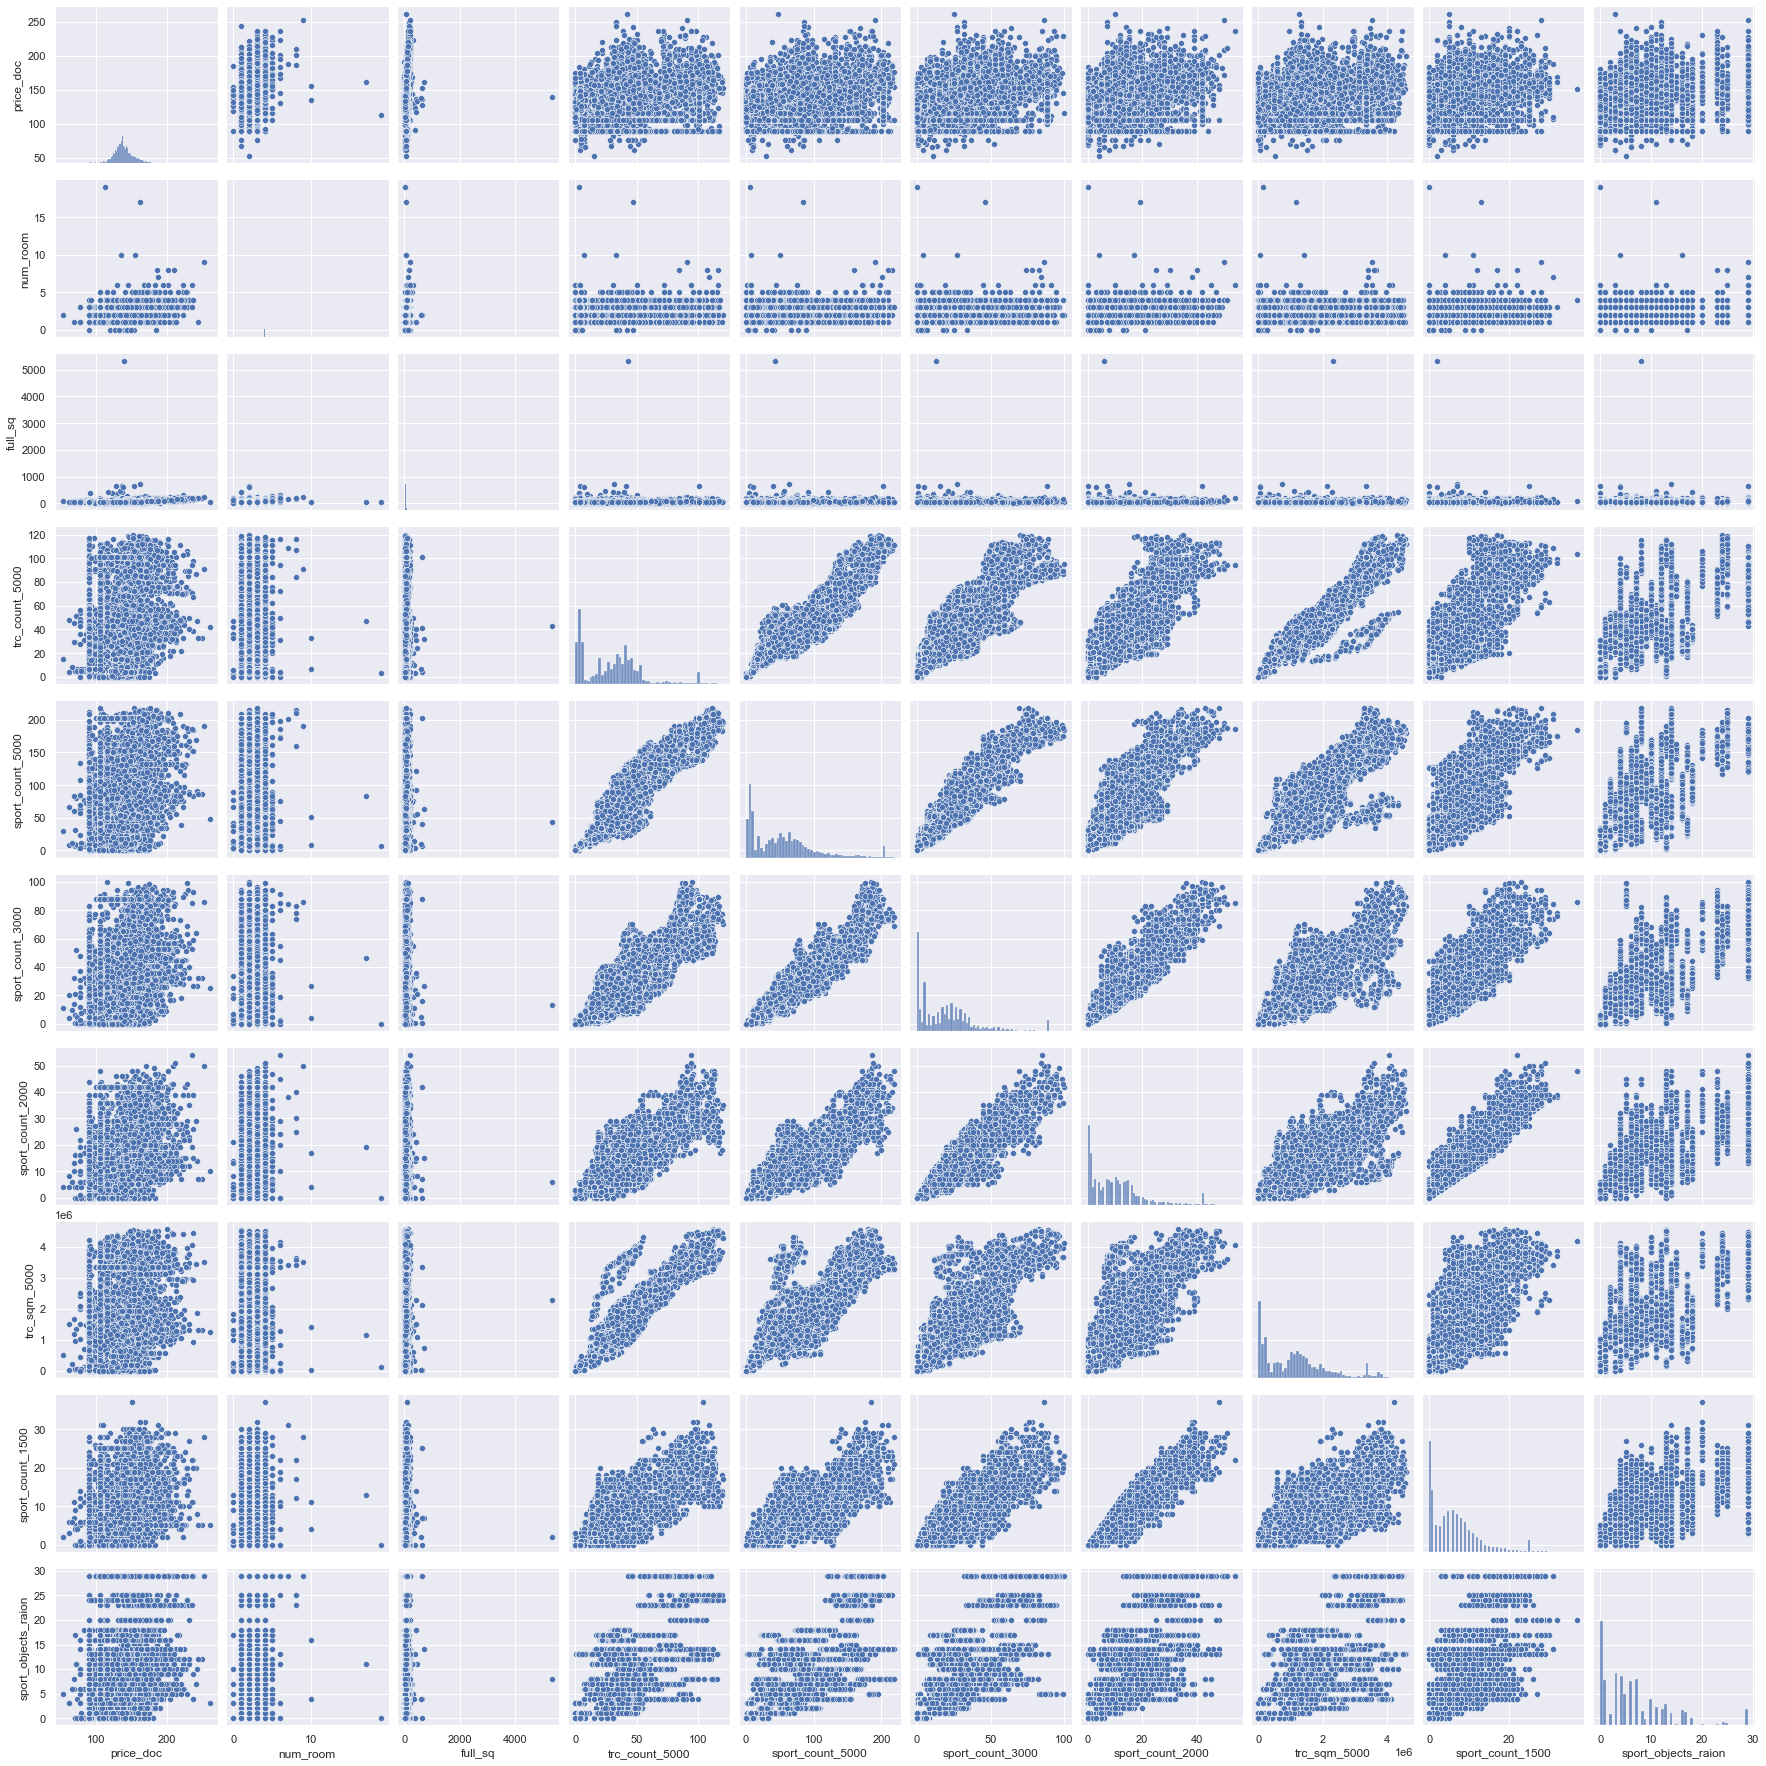

In [21]:
##Question 6: How to plot the pairwise scatterplot?
sns.set()
# cols = ['price_doc', 'num_room', 'trc_count_5000']
sns.pairplot(train[cols], height = 2.5)
plt.show();

# Feature Engineering

In [32]:
##Question 7: How to concatenate the train and test datasets?
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.price_doc.values
all_data = pd.concat((train, test)).reset_index(drop=True)

all_data.drop(['price_doc'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (38133, 291)


In [33]:
##Question 8: How do you drop features of high missing ratio? How to impute the rest ones with missing values? 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
hospital_beds_raion,46.833451
cafe_sum_500_max_price_avg,43.112265
cafe_sum_500_min_price_avg,43.112265
cafe_avg_price_500,43.112265
build_year,38.428658
state,37.377075
max_floor,25.101618
material,25.101618
num_room,25.101618
kitch_sq,25.101618


In [37]:
all_data = all_data.drop((missing_data[missing_data['Missing Ratio']>0.1]).index, 1)

In [38]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
product_type,0.086539
green_part_2000,0.049826


In [39]:
all_data = all_data.fillna(0)

In [40]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [41]:
all_data.shape

(38133, 240)

In [42]:
all_data.head()

,id,timestamp,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,...,552,319,108,17,135,236,2,91,195,14


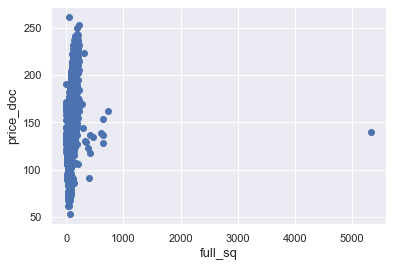

In [44]:
##Question 9: How do you detect outliers and how to remove them? 
fig, ax = plt.subplots()
ax.scatter(x = train['full_sq'], y = train['price_doc'])
plt.ylabel('price_doc', fontsize=13)
plt.xlabel('full_sq', fontsize=13)
plt.show()

In [45]:
train[['full_sq','price_doc']].describe()

,full_sq,price_doc
count,30471.000000,30471.000000
mean,54.214269,137.012426
std,38.031487,18.216701
min,0.000000,52.525922
25%,38.000000,128.656931
50%,49.000000,137.119975
75%,63.000000,146.098647
max,5326.000000,261.784886


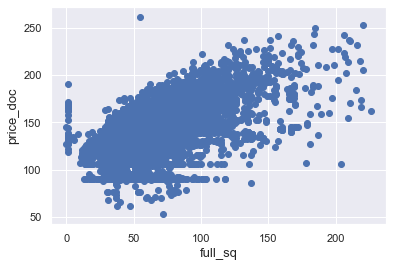

In [46]:
train = train.drop(train[train['full_sq']>250].index)
fig, ax = plt.subplots()
ax.scatter(train['full_sq'], train['price_doc'])
plt.ylabel('price_doc', fontsize=13)
plt.xlabel('full_sq', fontsize=13)
plt.show()

In [47]:
##Question 10: How to convert categorical features into numeric ones?
all_data.convert_dtypes()

,id,timestamp,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43.0,Investment,Bibirevo,6407578.1,155572,0.189727,0.00007,9576,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34.0,Investment,Nagatinskij Zaton,9589336.912,115352,0.372602,0.049637,6880,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43.0,Investment,Tekstil'shhiki,4808269.831,101708,0.11256,0.118537,5879,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89.0,Investment,Mitino,12583535.69,178473,0.194703,0.069753,13087,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77.0,Investment,Basmannoe,8398460.622,108171,0.015234,0.037316,5706,...,552,319,108,17,135,236,2,91,195,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,38131,2016-05-26,52.2,Investment,Kon'kovo,7811375.434,153248,0.127002,0.13565,7517,...,81,28,1,1,8,39,2,3,75,12
38129,38132,2016-05-28,54.09,OwnerOccupier,Poselenie Desjonovskoe,52995275.39,13890,0.349935,0.011654,953,...,1,2,1,0,0,10,0,0,0,0
38130,38133,2016-05-30,41.08,OwnerOccupier,Tverskoe,7307410.574,75377,0.065444,0.000078,4237,...,636,371,141,26,150,249,2,105,203,13
38131,38134,2016-05-30,34.8,Investment,Orehovo-Borisovo Juzhnoe,7128794.338,145576,0.07579,0.100456,5594,...,16,7,2,0,5,11,0,2,43,10


In [48]:
all_data.select_dtypes(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,2016-05-26,Investment,Kon'kovo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory
38129,2016-05-28,OwnerOccupier,Poselenie Desjonovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
38130,2016-05-30,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent
38131,2016-05-30,Investment,Orehovo-Borisovo Juzhnoe,no,no,no,no,no,no,yes,no,no,no,no,no,poor


In [49]:
from sklearn.preprocessing import LabelEncoder
cols = (   
        'product_type', 'sub_area','culture_objects_top_25', 'thermal_power_plant_raion', 
         'incineration_raion',   'oil_chemistry_raion', 'radiation_raion', 'big_market_raion',
        'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line',
        'railroad_1line', 'railroad_terminal_raion','ecology')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (38133, 240)


In [50]:
all_data.head()

,id,timestamp,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,2011-08-20,43.0,1,9,6.407578e+06,155572,0.189727,0.000070,9576,...,40,9,4,0,13,22,1,0,52,4
1,2,2011-08-23,34.0,1,70,9.589337e+06,115352,0.372602,0.049637,6880,...,36,15,3,0,15,29,1,10,66,14
2,3,2011-08-27,43.0,1,129,4.808270e+06,101708,0.112560,0.118537,5879,...,25,10,3,0,11,27,0,4,67,10
3,4,2011-09-01,89.0,1,65,1.258354e+07,178473,0.194703,0.069753,13087,...,15,11,2,1,4,4,0,0,26,3
4,5,2011-09-05,77.0,1,6,8.398461e+06,108171,0.015234,0.037316,5706,...,552,319,108,17,135,236,2,91,195,14


In [51]:
all_data['Total_cafe_count'] = all_data['cafe_count_5000_price_500'] + all_data['cafe_count_5000_price_1000'] + all_data['cafe_count_5000_price_1500'] + all_data['cafe_count_5000_price_2500'] + all_data['cafe_count_5000_price_4000'] + all_data['cafe_count_5000_price_high']

In [52]:
all_data.drop(['cafe_count_5000_price_500'], axis=1, inplace=True)
all_data.drop(['cafe_count_5000_price_1000'], axis=1, inplace=True)
all_data.drop(['cafe_count_5000_price_1500'], axis=1, inplace=True)
all_data.drop(['cafe_count_5000_price_2500'], axis=1, inplace=True)
all_data.drop(['cafe_count_5000_price_4000'], axis=1, inplace=True)
all_data.drop(['cafe_count_5000_price_high'], axis=1, inplace=True)


In [53]:
all_data.drop(['id'], axis=1, inplace=True)
all_data.drop(['timestamp'], axis=1, inplace=True)

In [54]:
all_data.head()

,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,...,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,Total_cafe_count
0,43.0,1,9,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,...,4036616,152,12,13,22,1,0,52,4,140
1,34.0,1,70,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,...,2034942,177,9,15,29,1,10,66,14,168
2,43.0,1,129,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,...,1572990,122,10,11,27,0,4,67,10,112
3,89.0,1,65,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,...,942180,61,4,4,4,0,0,26,3,57
4,77.0,1,6,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,...,3503058,2283,143,135,236,2,91,195,14,2140


In [95]:
all_data = pd.get_dummies(all_data)

In [98]:
all_data = np.log1p(all_data)
all_data.head()

,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,...,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,Total_cafe_count
0,0.942082,0.423036,0.786048,1.338623,1.270174,0.148577,0.000070,1.199711,0.706395,1.201887,...,1.331227,1.028483,0.820286,0.829305,0.883605,0.423036,0.000000,0.956848,0.672503,1.023595
1,0.922790,0.423036,0.978567,1.344869,1.263593,0.243052,0.046223,1.189702,0.706395,1.193392,...,1.319758,1.037307,0.786048,0.844907,0.909015,0.423036,0.798928,0.974394,0.837467,1.034315
2,0.942082,0.423036,1.018643,1.334058,1.260764,0.096536,0.100913,1.184787,0.672503,1.186496,...,1.315279,1.015215,0.798928,0.810237,0.902628,0.000000,0.672503,0.975466,0.798928,1.009876
3,0.994996,0.423036,0.973301,1.348974,1.273130,0.151631,0.063212,1.208786,0.786048,1.210024,...,1.306073,0.968711,0.672503,0.672503,0.672503,0.000000,0.000000,0.899204,0.625800,0.963729
4,0.985201,0.423036,0.732569,1.342835,1.262153,0.014894,0.035350,1.183842,0.753653,1.189102,...,1.328904,1.152844,1.024864,1.021405,1.053223,0.554618,0.996469,1.042772,0.837467,1.150495


# Training 

In [99]:
##Question 11: How to perform train-test split after the data engineering?
train = all_data[:ntrain]
test = all_data[ntrain:]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 233 entries, full_sq to Total_cafe_count
dtypes: float64(233)
memory usage: 54.2 MB


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 30471 to 38132
Columns: 233 entries, full_sq to Total_cafe_count
dtypes: float64(233)
memory usage: 13.6 MB


In [101]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# Install lightbgm package: https://lightgbm.readthedocs.io/en/latest/Installation-Guide.html#macos
import lightgbm as lgb
import xgboost as xgb

In [102]:
##Question 12: How to fine tune the parameters of each model?
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
alpha = [10**-6, 10**-4, 10**-2, 0.1, 0.3, 0.5]
l1 = np.linspace(0.1, 1, num=10)
param_grid = [{'alpha':alpha, 'l1_ratio': l1}]

elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5,scoring='neg_mean_squared_error')
gm_cv.fit(train.values, y_train)
print("Tuned ElasticNet alpha and l1 ratio: {}".format(gm_cv.best_params_))

Tuned ElasticNet alpha and l1 ratio: {'alpha': 0.0001, 'l1_ratio': 0.7000000000000001}


In [103]:
tuned_params = [{'alpha': alpha}]
lasso = Lasso()

lg_cv = GridSearchCV(lasso, tuned_params, cv=5)
lg_cv.fit(train.values, y_train)
print("Tuned Lasso: {}".format(lg_cv.best_params_))

Tuned Lasso: {'alpha': 0.0001}


In [104]:
ridge = Ridge()
rg_cv = GridSearchCV(ridge, tuned_params, cv=5)
rg_cv.fit(train.values, y_train)
print("Tuned Ridge: {}".format(rg_cv.best_params_))
print('')

Tuned Ridge: {'alpha': 0.0001}



In [105]:
# Tune the randome forest model
param_grid = [
    {'n_estimators':[10, 30,50], 'max_features': [15,30,45,100,120,140,160,180,195]},  # try 3x3=9 combinations
    #{'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so (12+6)*5 = 80 rounds of training in total
grid_search.fit(train.values, y_train)
grid_search.best_params_  # best parameters

{'max_features': 100, 'n_estimators': 50}

In [114]:
# Tune the LGB model
param_grid = [
    {'n_estimators':[10, 30,50], 'max_features': [15,30,45,100,120,140,160,180,195]},  # try 3x3=9 combinations
    #{'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

LGB = lgb.LGBMRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so (12+6)*5 = 80 rounds of training in total
grid_search.fit(train.values, y_train)
grid_search.best_params_  # best parameters

{'max_features': 45, 'n_estimators': 50}

In [116]:
# Tune the XGBoost model
param_grid = [
    {'n_estimators':[10, 30,50], 'max_features': [15,30,45,100,120,140,160,180,195]},  # try 3x3=9 combinations
    #{'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

XGB = xgb.XGBRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so (12+6)*5 = 80 rounds of training in total
grid_search.fit(train.values, y_train)
grid_search.best_params_  # best parameters

{'max_features': 45, 'n_estimators': 50}

In [107]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [63]:
##Question 13: What is the difference between lasso and ridge? When to use laso and when to use ridge?

Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, the absolute values of weight will be (in general) reduced, and many will tend to be zeros. 
Ridge takes a step further and penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed. 
If there are lots of features in the dataset, and all of them are not that important. So, this works well for feature selection in case we have a huge number of features. However, if there are only few features and it is sure that they have a high association with predictions, Ridge is good.

**Base models**

In [117]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0001, random_state=1))
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0001, l1_ratio=0.7000000000000001, random_state=3))
ridge = make_pipeline(RobustScaler(), Ridge(alpha=0.0001, random_state=1))

In [118]:
# random forest
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=100, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [123]:
# LightGBM Regression
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5, max_features=45,
                              learning_rate=0.05, n_estimators=50,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [124]:
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, max_features=45,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=50,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

**Base models scores**

In [109]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 14.8033 (1.2201)



In [110]:
score = rmsle_cv(Enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 14.8028 (1.2201)



In [111]:
score = rmsle_cv(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge score: 14.8043 (1.2106)



In [112]:
score = rmsle_cv(rf)
print("RF score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

RF score: 14.1466 (1.3435)



In [125]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[00:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, silent } might not be used.

  This may not be accurate due to some parame

In [126]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_he

In [127]:
##Question 14: How to ensemble the results of several models?
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [130]:
averaged_models = AveragingModels(models = (Enet, rf))
score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f}({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 13.8133(1.3236)



In [131]:
# rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [132]:
averaged_models.fit(train.values, y_train)
train_pred = averaged_models.predict(train)
stacked_pred = np.expm1(averaged_models.predict(test.values))

In [136]:
# Ensemble prediction
ensemble = stacked_pred

# Testing 

In [135]:
print('RMSLE score on train data:')
print(rmsle(y_train,train_pred))

RMSLE score on train data:
9.67342860979425


In [147]:
#Question 15: How to evaluate and submit the model with the test dataset?
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['Price'] = ensemble
sub.to_csv('submission.csv',index=False)